--- Начало процесса: Сравнение вашей фотографии с объединенным датасетом ---
--- ЧАСТЬ 1: Загрузка Основной Фотографии ---


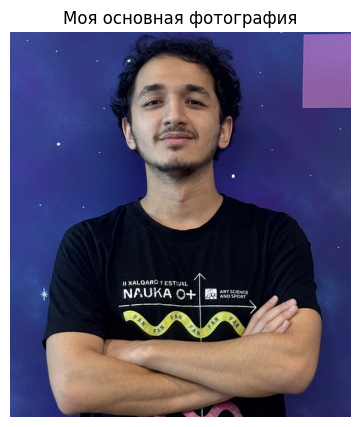

Кодировка вашего лица успешно получена. Размер кодировки: 128 чисел.
Обнаружено лиц на вашей основной фотографии: 1


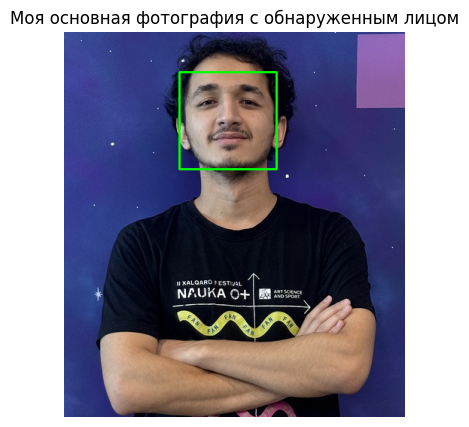

--- Завершение Части 1 ---

--- ЧАСТЬ 2: Подготовка LFW Датасета и получение кодировок ---
Загружаем LFW датасет (только люди с 20+ фото, уменьшенные изображения)...
LFW датасет загружен. Количество изображений: 3023
Количество уникальных личностей: 62


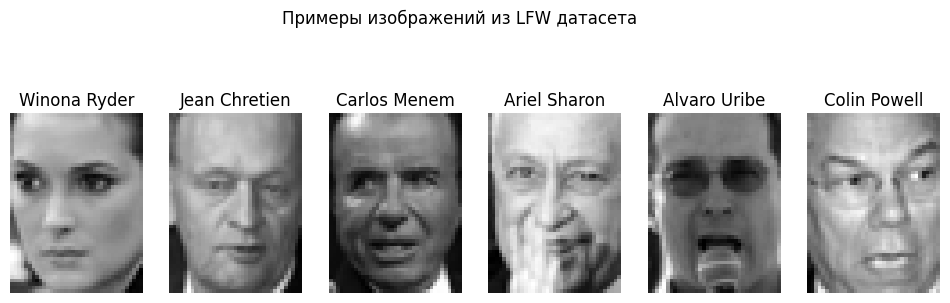

Начинаем получать кодировки лиц для 3023 изображений LFW датасета...
  Обработано 100/3023 изображений LFW...
  Обработано 200/3023 изображений LFW...
  Обработано 300/3023 изображений LFW...
  Обработано 400/3023 изображений LFW...
  Обработано 500/3023 изображений LFW...
  Обработано 600/3023 изображений LFW...
  Обработано 700/3023 изображений LFW...
  Обработано 800/3023 изображений LFW...
  Обработано 900/3023 изображений LFW...
  Обработано 1000/3023 изображений LFW...
  Обработано 1100/3023 изображений LFW...
  Обработано 1200/3023 изображений LFW...
  Обработано 1300/3023 изображений LFW...
  Обработано 1400/3023 изображений LFW...
  Обработано 1500/3023 изображений LFW...
  Обработано 1600/3023 изображений LFW...
  Обработано 1700/3023 изображений LFW...
  Обработано 1800/3023 изображений LFW...
  Обработано 1900/3023 изображений LFW...
  Обработано 2000/3023 изображений LFW...
  Обработано 2100/3023 изображений LFW...
  Обработано 2200/3023 изображений LFW...
  Обработано 230

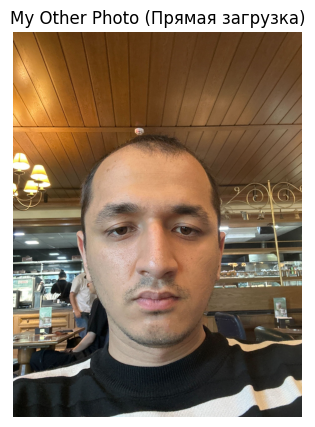

Кодировка для 'My Other Photo (Прямая загрузка)' успешно получена. Найдено лиц: 1
--- Завершение Части 3 ---

--- ЧАСТЬ 4: Объединение Кодировок и Сравнение ---
Общее количество кодировок для сравнения: 2338

Начинаем сравнение вашей основной фотографии со всеми объединенными лицами...

--- Топ-5 самых ПОХОЖИХ лиц (из LFW и вашей второй фотографии) на ВАШУ основную фотографию ---
  1. Имя: My Other Photo (Прямая загрузка), Расстояние: 0.3834, Схожесть: 72.29%
  2. Имя: Hamid Karzai, Расстояние: 0.5816, Схожесть: 63.23%
  3. Имя: Hamid Karzai, Расстояние: 0.6118, Схожесть: 62.04%
  4. Имя: Hamid Karzai, Расстояние: 0.6137, Схожесть: 61.97%
  5. Имя: Hamid Karzai, Расстояние: 0.6224, Схожесть: 61.64%


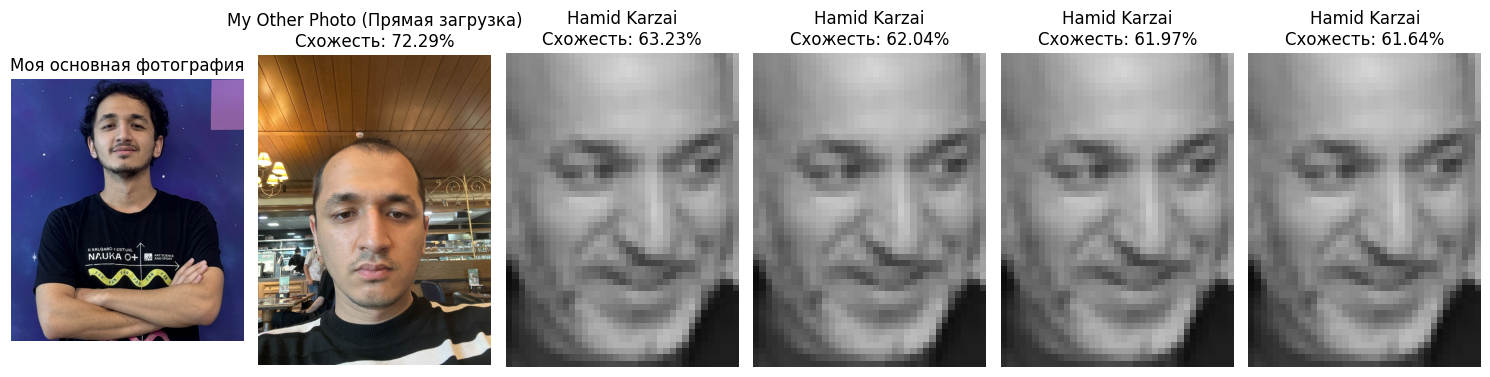


--- Расчет средней схожести ---
Средняя схожесть вашей фотографии со всеми объединенными лицами: 54.02%

--- Топ-5 самых НЕПОХОЖИХ лиц на ВАШУ фотографию ---
  1. Имя: Naomi Watts, Расстояние: 1.0724, Схожесть: 48.25%
  2. Имя: Naomi Watts, Расстояние: 1.0609, Схожесть: 48.52%
  3. Имя: Naomi Watts, Расстояние: 1.0558, Схожесть: 48.64%
  4. Имя: Naomi Watts, Расстояние: 1.0429, Схожесть: 48.95%
  5. Имя: Naomi Watts, Расстояние: 1.0389, Схожесть: 49.05%


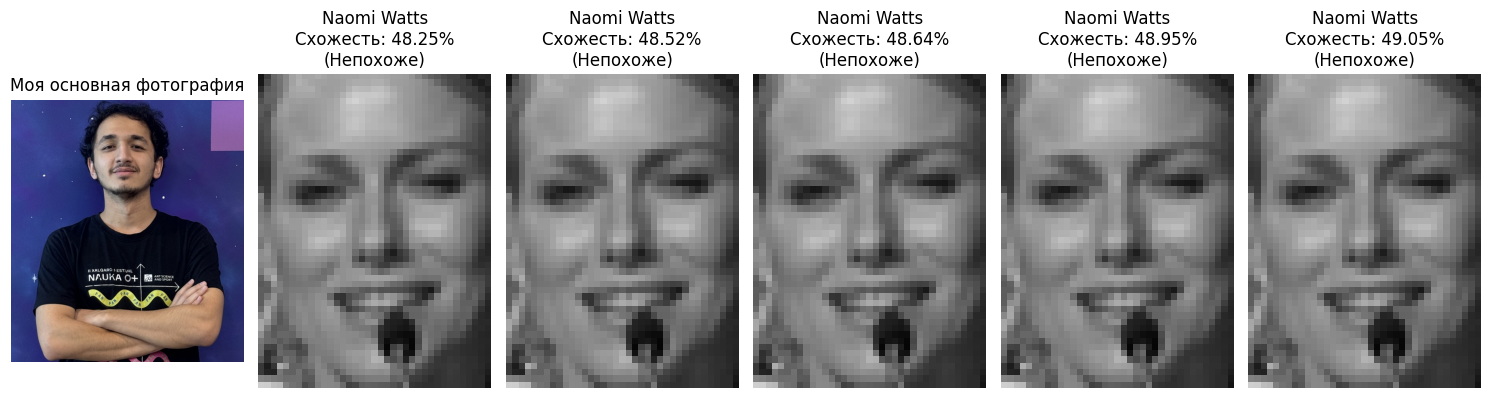


--- Весь процесс завершен ---


In [ ]:
# --- 0. Импорт Необходимых Библиотек ---
import face_recognition
import cv2
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import os

print("--- Начало процесса: Сравнение вашей фотографии с объединенным датасетом ---")

# --------------------------------------------------------------------------------
# --- ЧАСТЬ 1: Загрузка Основной Фотографии ---
# --------------------------------------------------------------------------------

print("--- ЧАСТЬ 1: Загрузка Основной Фотографии ---")

# УКАЖИТЕ ПРАВИЛЬНЫЙ ПУТЬ К ВАШЕЙ ОСНОВНОЙ ФОТОГРАФИИ!
my_photo_path = '/Users/khatabaev/Desktop/My photo.png' # <--- ПРОВЕРЬТЕ ЭТОТ ПУТЬ

my_image = None
my_face_encoding = None

try:
    my_image = face_recognition.load_image_file(my_photo_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(my_image)
    plt.title("Моя основная фотография")
    plt.axis('off')
    plt.show()

    my_face_locations = face_recognition.face_locations(my_image)
    if not my_face_locations:
        print("Ошибка: Лицо не найдено на вашей основной фотографии. Убедитесь, что лицо четко видно.")
        my_face_encoding = None
    else:
        my_face_encoding = face_recognition.face_encodings(my_image, my_face_locations)[0]
        print(f"Кодировка вашего лица успешно получена. Размер кодировки: {len(my_face_encoding)} чисел.")
        print(f"Обнаружено лиц на вашей основной фотографии: {len(my_face_locations)}")

        top, right, bottom, left = my_face_locations[0]
        image_with_face = my_image.copy()
        cv2.rectangle(image_with_face, (left, top), (right, bottom), (0, 255, 0), 2)

        plt.figure(figsize=(5, 5))
        plt.imshow(image_with_face)
        plt.title("Моя основная фотография с обнаруженным лицом")
        plt.axis('off')
        plt.show()

except FileNotFoundError:
    print(f"Ошибка: Файл вашей основной фотографии по пути '{my_photo_path}' не найден. Проверьте путь.")
except Exception as e:
    print(f"Произошла ошибка при загрузке или обработке вашей основной фотографии: {e}")

print("--- Завершение Части 1 ---\n")

# --------------------------------------------------------------------------------
# --- ЧАСТЬ 2: Подготовка LFW Датасета и получение кодировок ---
# --------------------------------------------------------------------------------

print("--- ЧАСТЬ 2: Подготовка LFW Датасета и получение кодировок ---")

print("Загружаем LFW датасет (только люди с 20+ фото, уменьшенные изображения)...")
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

# Исходные данные LFW
lfw_images_raw = lfw_people.images
lfw_names_raw = lfw_people.target_names[lfw_people.target]

print(f"LFW датасет загружен. Количество изображений: {len(lfw_images_raw)}")
print(f"Количество уникальных личностей: {len(np.unique(lfw_names_raw))}")

# Отображаем несколько примеров изображений из загруженного датасета
plt.figure(figsize=(12, 4))
for i in range(min(6, len(lfw_images_raw))):
    plt.subplot(1, 6, i + 1)
    plt.imshow(lfw_images_raw[i], cmap='gray')
    plt.title(lfw_names_raw[i])
    plt.axis('off')
plt.suptitle("Примеры изображений из LFW датасета")
plt.show()

lfw_face_encodings = []
lfw_face_names = []
successfully_encoded_lfw_count = 0
failed_to_encode_lfw_count = 0

print(f"Начинаем получать кодировки лиц для {len(lfw_images_raw)} изображений LFW датасета...")

for i, image_data in enumerate(lfw_images_raw):
    if (i + 1) % 100 == 0 or (i + 1) == len(lfw_images_raw):
        print(f"  Обработано {i + 1}/{len(lfw_images_raw)} изображений LFW...")

    # Конвертация float (0-1) grayscale в uint8 (0-255) RGB
    image_uint8 = (image_data * 255).astype(np.uint8)
    image_final_rgb = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2RGB)

    face_locations = face_recognition.face_locations(image_final_rgb)

    if face_locations:
        encodings = face_recognition.face_encodings(image_final_rgb, face_locations)
        if encodings:
            lfw_face_encodings.append(encodings[0])
            lfw_face_names.append(lfw_names_raw[i])
            successfully_encoded_lfw_count += 1
        else:
            failed_to_encode_lfw_count += 1
    else:
        failed_to_encode_lfw_count += 1

print(f"\nКодировки лиц LFW получены. Успешно закодировано: {successfully_encoded_lfw_count} лиц.")
print(f"Не удалось найти лицо или получить кодировку для: {failed_to_encode_lfw_count} изображений LFW.")
print(f"Общее количество ВАЛИДНЫХ кодировок LFW: {len(lfw_face_encodings)}")
print("--- Завершение Части 2 ---\n")

# --------------------------------------------------------------------------------
# --- ЧАСТЬ 3: Подготовка Кодировки Вашей Второй Фотографии (Напрямую) ---
# --------------------------------------------------------------------------------

print("--- ЧАСТЬ 3: Подготовка Кодировки Вашей Второй Фотографии (Напрямую) ---")

# УКАЖИТЕ ПРАВИЛЬНЫЙ ПУТЬ КО ВТОРОЙ ВАШЕЙ ФОТОГРАФИИ!
other_photo_path = '/Users/khatabaev/Desktop/To_dataset.jpg' # <--- ПРОВЕРЬТЕ ЭТОТ ПУТЬ

other_photo_encoding = None
other_photo_name_for_display = "My Other Photo (Прямая загрузка)"
other_photo_image = None

print(f"Загружаем вашу вторую фотографию: '{other_photo_path}' для прямой кодировки...")

try:
    other_photo_image = face_recognition.load_image_file(other_photo_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(other_photo_image)
    plt.title(other_photo_name_for_display)
    plt.axis('off')
    plt.show()

    face_locations_other = face_recognition.face_locations(other_photo_image)
    if face_locations_other:
        other_photo_encoding = face_recognition.face_encodings(other_photo_image, face_locations_other)[0]
        print(f"Кодировка для '{other_photo_name_for_display}' успешно получена. Найдено лиц: {len(face_locations_other)}")
    else:
        print(f"Ошибка: Лицо не найдено на фотографии '{other_photo_name_for_display}'. Убедитесь, что лицо четко видно.")

except FileNotFoundError:
    print(f"Ошибка: Файл '{other_photo_path}' не найден. Пожалуйста, проверьте путь.")
except Exception as e:
    print(f"Произошла ошибка при загрузке или обработке '{other_photo_name_for_display}': {e}")

print("--- Завершение Части 3 ---\n")


# --------------------------------------------------------------------------------
# --- ЧАСТЬ 4: Объединение Кодировок и Сравнение ---
# --------------------------------------------------------------------------------

print("--- ЧАСТЬ 4: Объединение Кодировок и Сравнение ---")

combined_encodings = []
combined_names = []
combined_original_images_info = [] # Будем хранить информацию для отображения (image_data, source_type, original_index_in_source)

# Добавляем кодировки LFW
for i, enc in enumerate(lfw_face_encodings):
    combined_encodings.append(enc)
    combined_names.append(lfw_face_names[i])
    # Сохраняем исходное изображение LFW для отображения
    original_idx = np.where(lfw_names_raw == lfw_face_names[i])[0][0] # Находим первый индекс в сырых данных
    combined_original_images_info.append({'image': lfw_images_raw[original_idx], 'name': lfw_face_names[i], 'source': 'LFW'})

# Добавляем кодировку вашей второй фотографии, если она была успешно получена
if other_photo_encoding is not None:
    combined_encodings.append(other_photo_encoding)
    combined_names.append(other_photo_name_for_display)
    combined_original_images_info.append({'image': other_photo_image, 'name': other_photo_name_for_display, 'source': 'Direct'})

print(f"Общее количество кодировок для сравнения: {len(combined_encodings)}")

if my_face_encoding is None:
    print("Ошибка: Кодировка вашей основной фотографии не была получена. Сравнение невозможно.")
elif not combined_encodings:
    print("Ошибка: Нет действительных кодировок для сравнения.")
else:
    print("\nНачинаем сравнение вашей основной фотографии со всеми объединенными лицами...")

    distances = face_recognition.face_distance(combined_encodings, my_face_encoding)
    top_5_indices = np.argsort(distances)[:5] # Сортируем по возрастанию расстояния

    print("\n--- Топ-5 самых ПОХОЖИХ лиц (из LFW и вашей второй фотографии) на ВАШУ основную фотографию ---")
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 6, 1)
    plt.imshow(my_image)
    plt.title("Моя основная фотография")
    plt.axis('off')

    for i, idx in enumerate(top_5_indices):
        person_name = combined_names[idx]
        distance_val = distances[idx]
        similarity_score = 1 / (1 + distance_val)

        print(f"  {i+1}. Имя: {person_name}, Расстояние: {distance_val:.4f}, Схожесть: {similarity_score:.2%}")

        plt.subplot(1, 6, i + 2)
        # Получаем исходное изображение для отображения
        img_info = combined_original_images_info[idx]
        img_to_show = img_info['image']

        # Конвертация для отображения (из float grayscale в RGB, или из RGB в RGB)
        if img_info['source'] == 'LFW':
            # Изображения LFW raw в float32 grayscale (0-1)
            img_to_show = cv2.cvtColor((img_to_show * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
        elif img_info['source'] == 'Direct':
            # Изображения прямой загрузки уже RGB (uint8)
            pass # Не требуется преобразование, face_recognition.load_image_file() делает это за нас

        plt.imshow(img_to_show)
        plt.title(f"{person_name}\nСхожесть: {similarity_score:.2%}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\n--- Расчет средней схожести ---")
    average_similarity_score = np.mean(1 / (1 + distances))
    print(f"Средняя схожесть вашей фотографии со всеми объединенными лицами: {average_similarity_score:.2%}")

    print("\n--- Топ-5 самых НЕПОХОЖИХ лиц на ВАШУ фотографию ---")
    top_5_most_dissimilar_indices = np.argsort(-distances)[:5] # Сортируем по убыванию расстояния

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 6, 1)
    plt.imshow(my_image)
    plt.title("Моя основная фотография")
    plt.axis('off')

    for i, idx in enumerate(top_5_most_dissimilar_indices):
        person_name = combined_names[idx]
        distance_val = distances[idx]
        similarity_score = 1 / (1 + distance_val)

        print(f"  {i+1}. Имя: {person_name}, Расстояние: {distance_val:.4f}, Схожесть: {similarity_score:.2%}")

        plt.subplot(1, 6, i + 2)
        img_info = combined_original_images_info[idx]
        img_to_show = img_info['image']

        if img_info['source'] == 'LFW':
            img_to_show = cv2.cvtColor((img_to_show * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
        elif img_info['source'] == 'Direct':
            pass

        plt.imshow(img_to_show)
        plt.title(f"{person_name}\nСхожесть: {similarity_score:.2%}\n(Непохоже)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\n--- Весь процесс завершен ---")